# Práctica 4 de IA

## 1. Construcción de clasificadores en bases de datos sintéticas (2 puntos)

In [1]:
# Esta primera parte está adaptada de:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [4]:
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

def plot_classifiers(classifiers, datasets):
    
    figure = plt.figure(figsize=(4*6, 4*4))
    h = .02  # step size in the mesh
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=.4,
                                                            random_state=42)
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data", fontsize=24)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
        
        # iterate over classifiers
        for name, clf in classifiers:
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            
            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)
            
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name, fontsize=24)
            ax.text(xx.max() - .3, yy.min() + .3, ('Score test: %.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
    
    plt.tight_layout()
    plt.show()

In [5]:
# data preparation
simple = make_blobs(n_samples=500, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
X,y = make_blobs(n_samples=500, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X*np.matrix([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=500),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=500)
           ]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


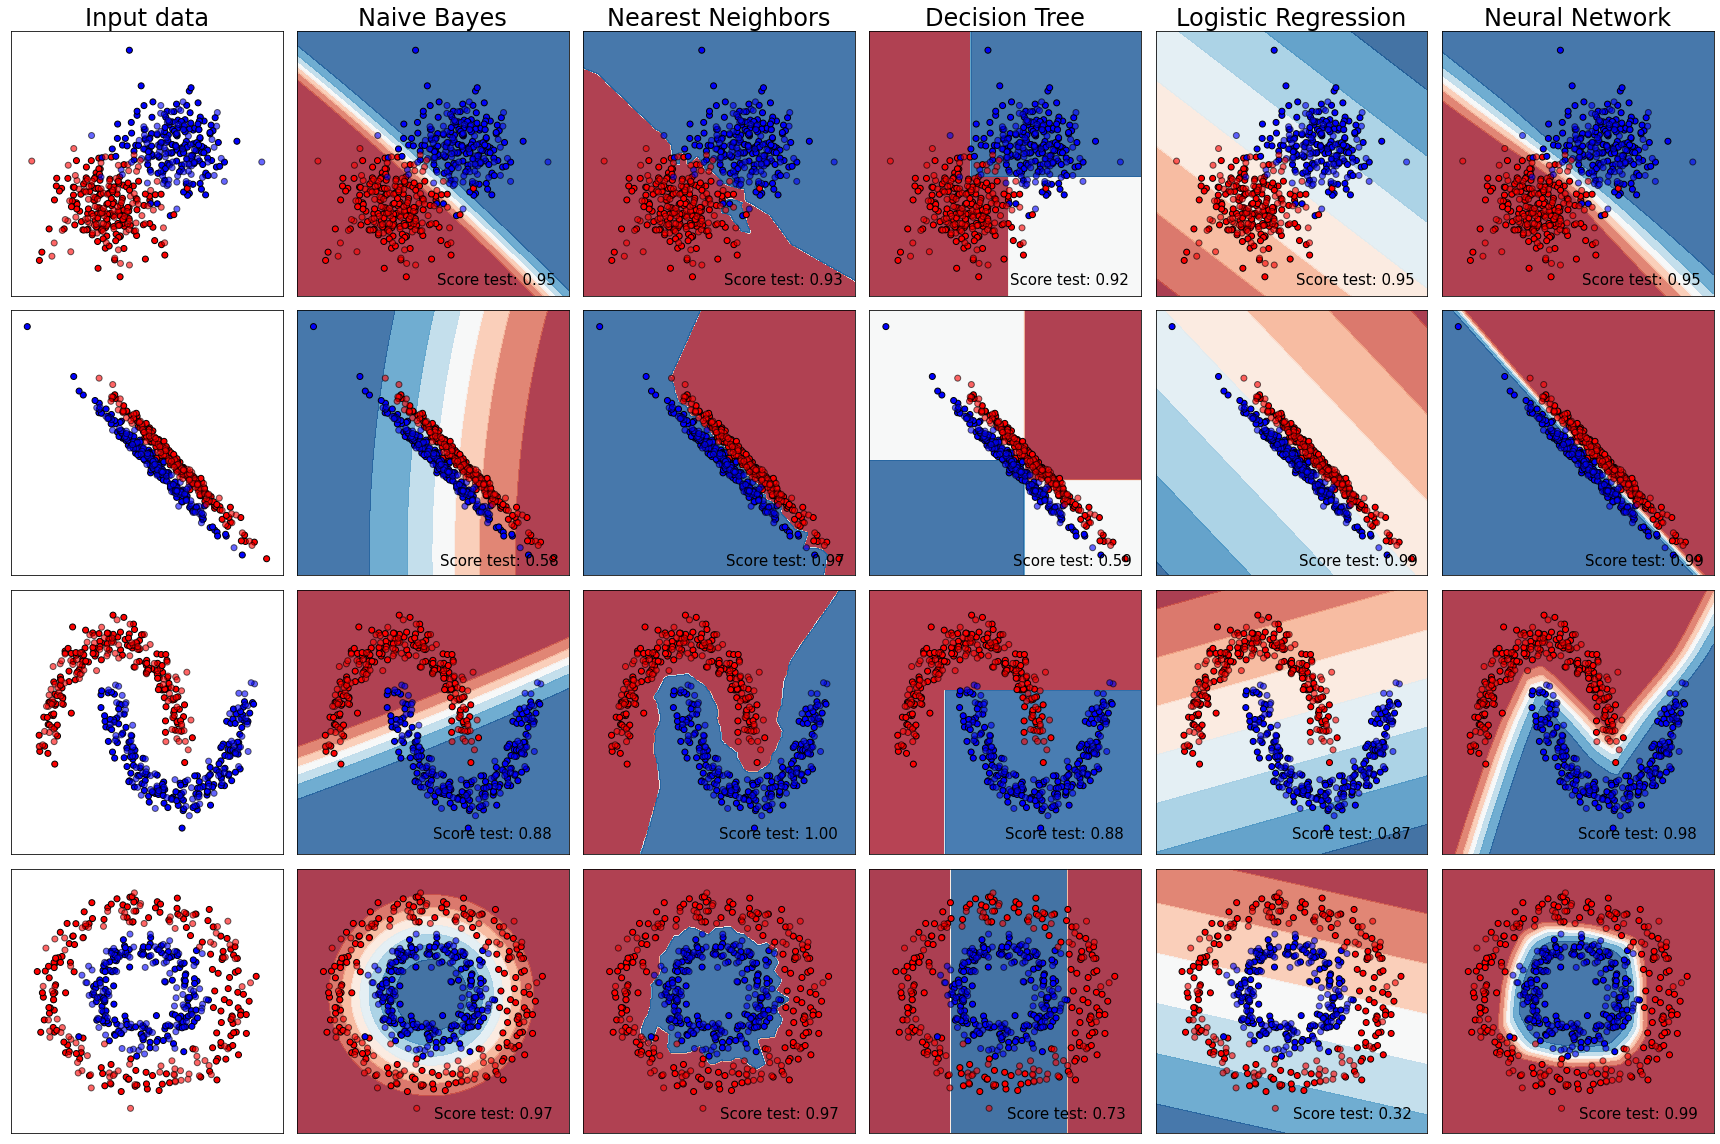

In [12]:
classifiers = [("Naive Bayes", GaussianNB()),
               ("Nearest Neighbors",
                KNeighborsClassifier(n_neighbors=1)), # número de vecinos
               ("Decision Tree",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=2)), # profundidad máxima del árbol
               ("Logistic Regression",
                LogisticRegression(C=1e10,solver='lbfgs')), # C: cuanto más alto menos regularización 
               ("Neural Network",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=1000,
                              alpha=0))]

plot_classifiers(classifiers, datasets)

In [7]:
# Listado de los parámetros de los diferentes clasificadores
for name, clf in classifiers:
    print(clf)

GaussianNB()
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(criterion='entropy', max_depth=2)
LogisticRegression(C=10000000000.0)
MLPClassifier(alpha=0, hidden_layer_sizes=(50,), max_iter=1000)


**Prueba a cambiar los siguientes parámetros (al menos 3-5 variantes en cada caso) y observa las consecuencias en la frontera de clasificación construida:**

* Número de vecinos en k-nn. ¿Por qué siempre debe ser impar cuando hay dos clases?\n

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


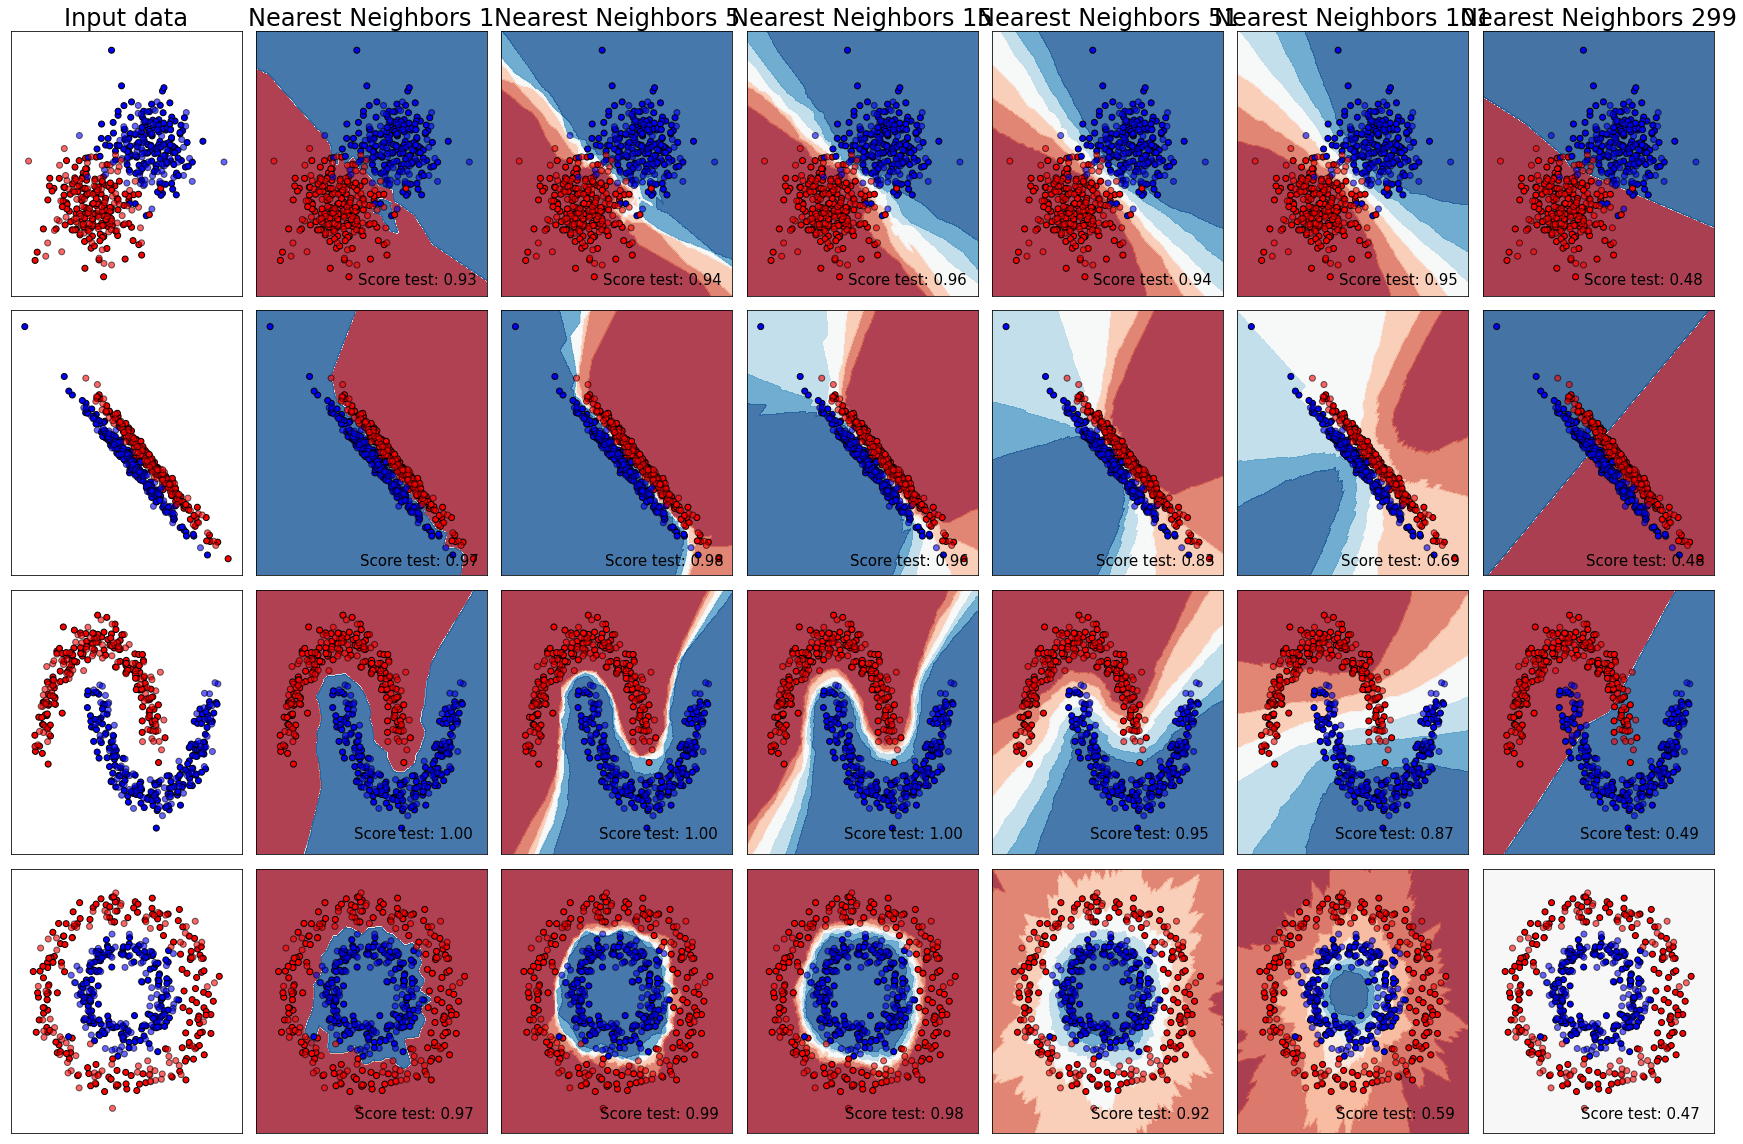

In [11]:
classifiers = [("Nearest Neighbors 1",
                KNeighborsClassifier(n_neighbors=1)),
               ("Nearest Neighbors 5",
                KNeighborsClassifier(n_neighbors=5)), # número de vecinos
               ("Nearest Neighbors 15",
                KNeighborsClassifier(n_neighbors=15)),
               ("Nearest Neighbors 51",
                KNeighborsClassifier(n_neighbors=51)), # número de vecinos
               ("Nearest Neighbors 101",
                KNeighborsClassifier(n_neighbors=101)), # número de vecinos
               ("Nearest Neighbors 299",
                KNeighborsClassifier(n_neighbors=299)), # número de vecinos
              ]

plot_classifiers(classifiers, datasets)

Es necesario que sea impar para que no sea posible un empate en la votación de los k vecinos y así siempre podamos dar una predicción.

Como ya hemos hablado en teoría varias veces y se ve en la salida del programa, un número muy bajo de vecinos da lugar a "overfitting" y un número muy alto de vecinos da lugar a "underfitting". Es decir, con pocos vecinos la frontera es más inestable (la varianza es muy elevada y el sesgo muy bajo), llegando a tener islas como se ve en el primer conjunto de datos. Con muchos vecinos sucede justo lo contrario, las fronteras son demasiado básicas (se puede observar que en el último caso son una línea recta) y no aciertan al predecir gran cantidad de los datos muestrales (el sesgo es muy elevado y la varianza muy baja).

* Profundidad máxima de los árboles de decisión.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


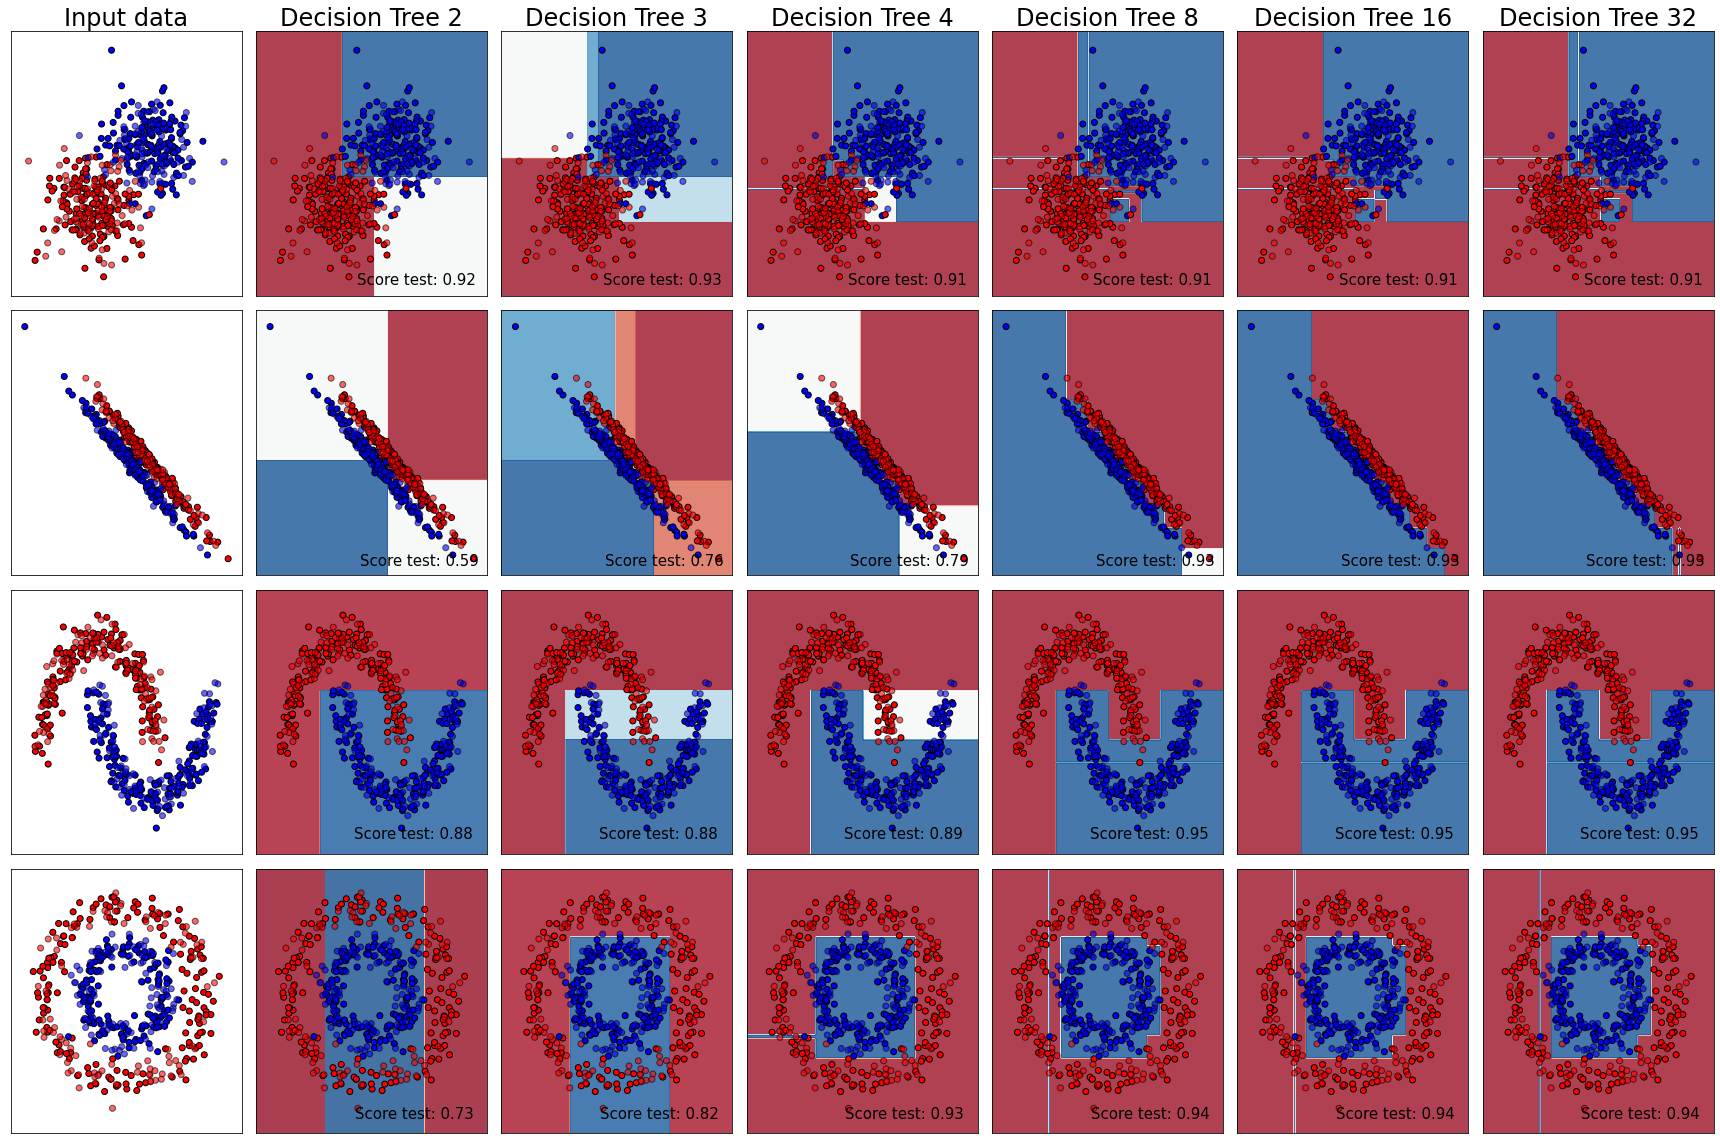

In [15]:
classifiers = [("Decision Tree 2",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=2)), # profundidad máxima del árbol
               ("Decision Tree 3",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=3)), # profundidad máxima del árbol
               ("Decision Tree 4",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=4)), # profundidad máxima del árbol
               ("Decision Tree 8",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=8)), # profundidad máxima del árbol
               ("Decision Tree 16",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=16)), # profundidad máxima del árbol
               ("Decision Tree 32",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=32)), # profundidad máxima del árbol
               ]

plot_classifiers(classifiers, datasets)

Observando los resultados podemos ver como va siendo más preciso a mayor profundidad mejorando la tasa de aciertos, aún así igual que hemos comentado antes (pero esta vez a la inversa) podemos ver que el cambio entre 3-4 a 8 con los primeros datos estadísticos genera un poco de "overfitting" pues añade unas líneas azules en territorio rojo que no tienen mucho sentido (baja la tasa de aciertos) y que seguramente estén causados por datos atípicos
Vemos que a partir de la profundidad 8 los resultados son prácticamente idénticos y aumentar la profundidad máxima del árbol de decisión ya no mejoramos en absoluto los resultados, por lo que es un gasto computacional innecesario.

* Número de neuronas en la red neuronal y máximo número de épocas de entrenamiento. **Nota:** (50,) indica una única capa oculta con 50 neuronas. (50,10,) indica dos capas ocultas con 50 y 10 neuronas respectivamente. (50,10,20,) indica tres capas ocultas con 50, 10 y 20 neuronas respectivamente, etc.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


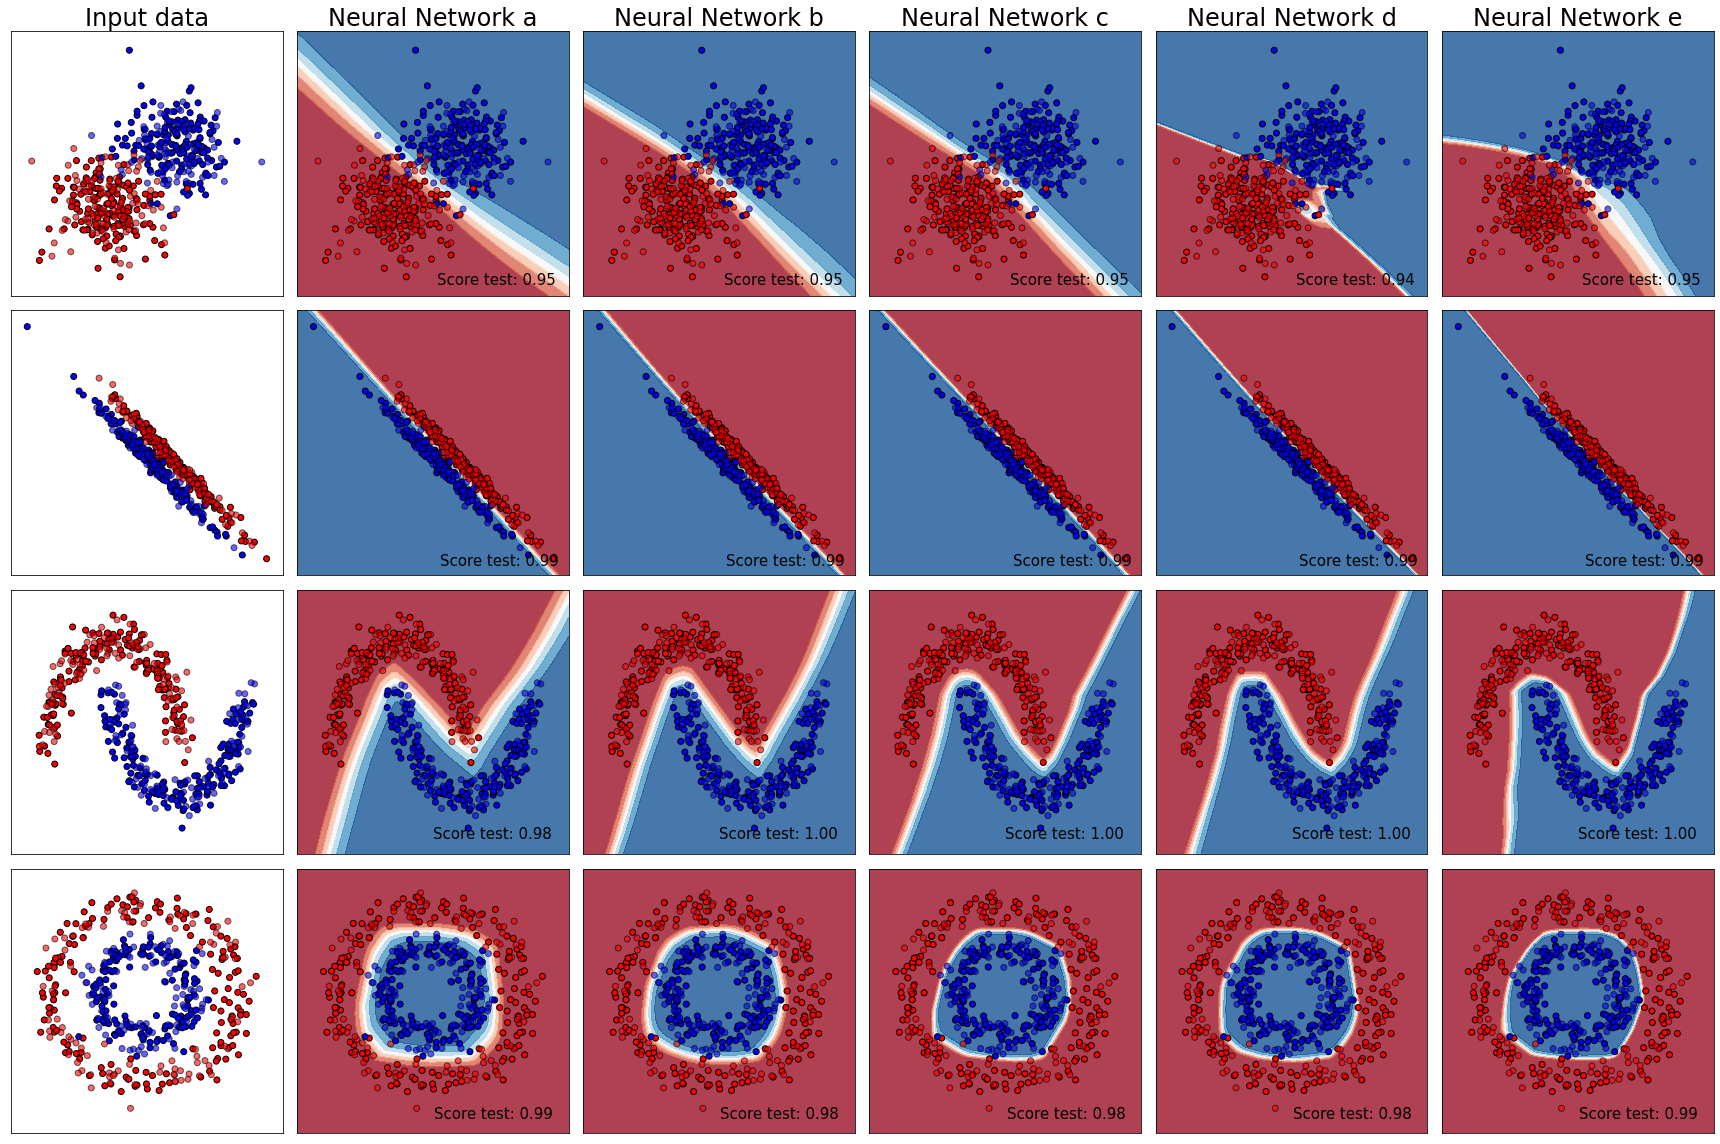

In [18]:
classifiers = [("Neural Network a",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=1000,
                              alpha=0)),
              ("Neural Network b",
                MLPClassifier(hidden_layer_sizes=(50,10,),
                              max_iter=1000,
                              alpha=0)),
              ("Neural Network c",
                MLPClassifier(hidden_layer_sizes=(50,10,20,),
                              max_iter=1000,
                              alpha=0)),
              ("Neural Network d",
                MLPClassifier(hidden_layer_sizes=(50,10,20,30,),
                              max_iter=1000,
                              alpha=0)),
              ("Neural Network e",
                MLPClassifier(hidden_layer_sizes=(50,10,20,30,50,),
                              max_iter=1000,
                              alpha=0)),
              ]

plot_classifiers(classifiers, datasets)

Probando a cambiar el número de las capas los resultados son casi idénticos, esto se debe en gran medida al alto número de neuronas y de iteraciones de entrenamiento.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimi

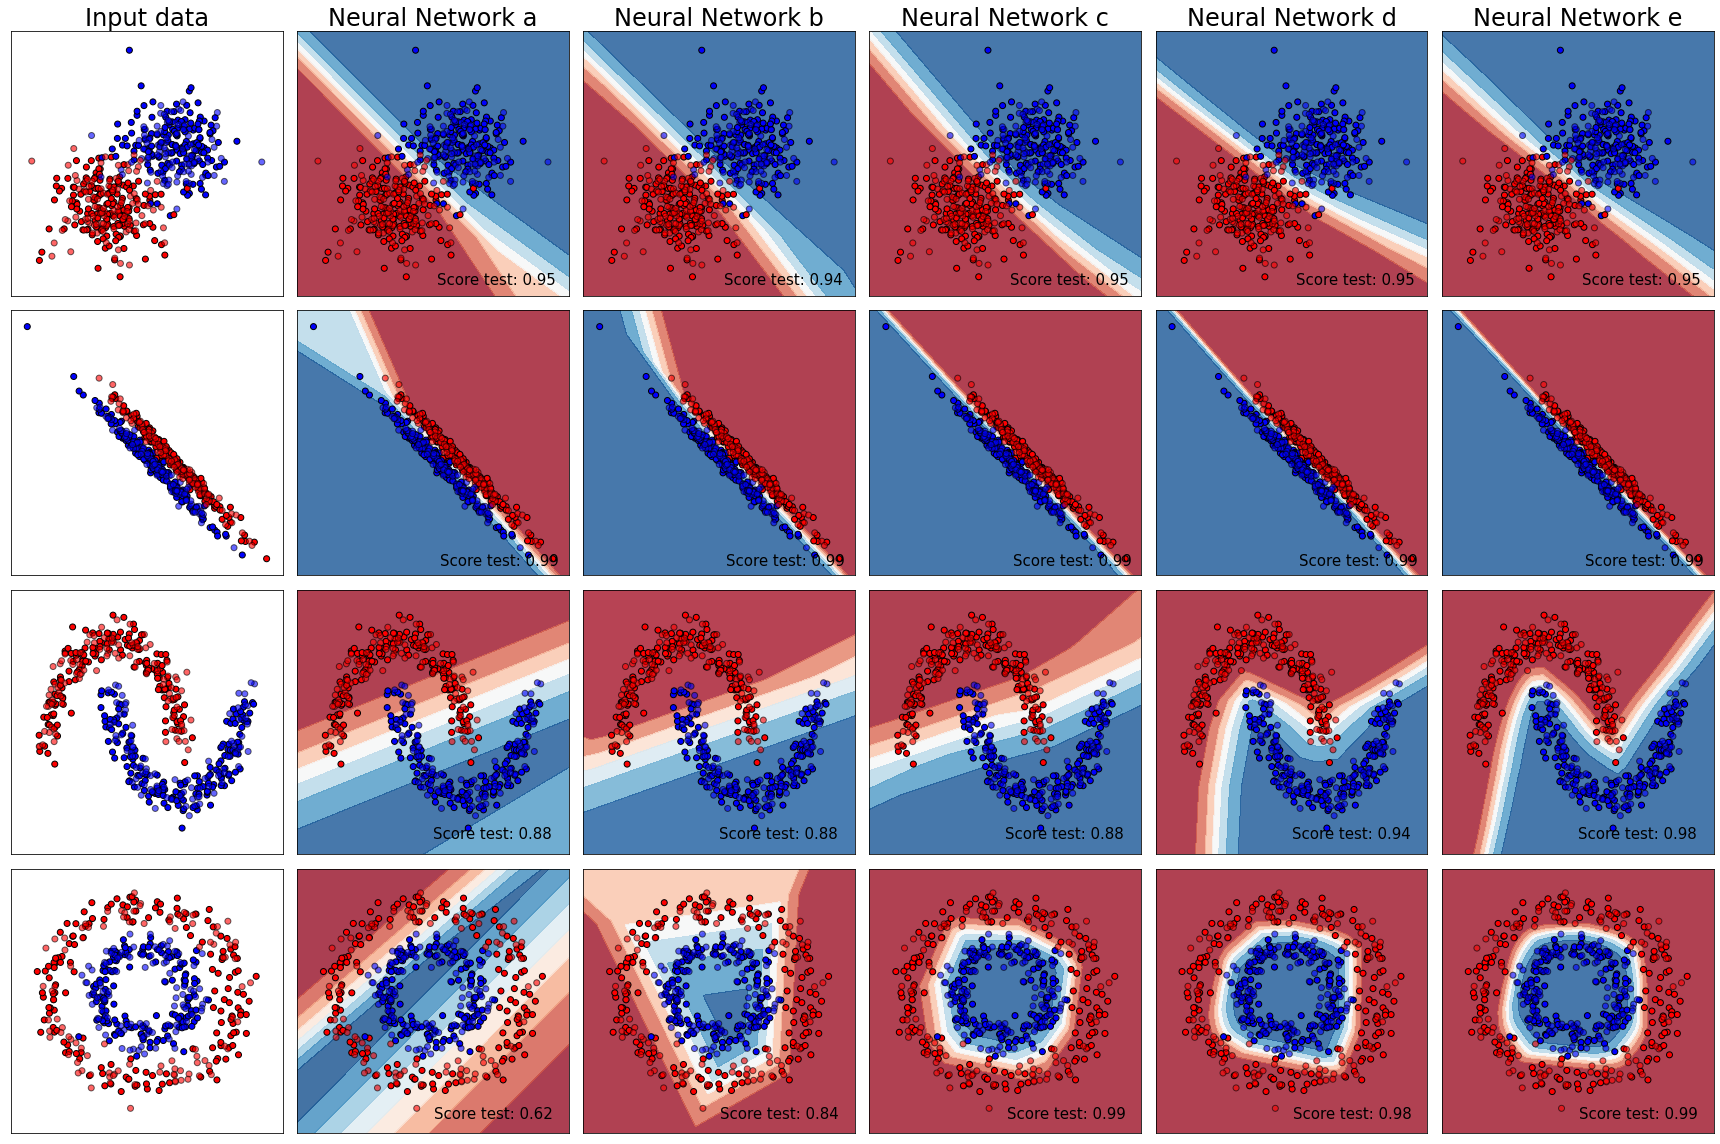

In [20]:
classifiers = [("Neural Network a",
                MLPClassifier(hidden_layer_sizes=(2,),
                              max_iter=1000,
                              alpha=0)),
              ("Neural Network b",
                MLPClassifier(hidden_layer_sizes=(4,),
                              max_iter=1000,
                              alpha=0)),
              ("Neural Network c",
                MLPClassifier(hidden_layer_sizes=(8,),
                              max_iter=1000,
                              alpha=0)),
              ("Neural Network d",
                MLPClassifier(hidden_layer_sizes=(15,),
                              max_iter=1000,
                              alpha=0)),
              ("Neural Network e",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=1000,
                              alpha=0)),
              ]

plot_classifiers(classifiers, datasets)

Este es el métdodo que menos afectado parace verse por el "overfitting", pues aumentando el número de neuronas o el número de capas nunca empeora. Obviamente con un número muy bajo de neuronas lo resultados dejan que desear, pero aún así los resultados en general son fantásticos.

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more 

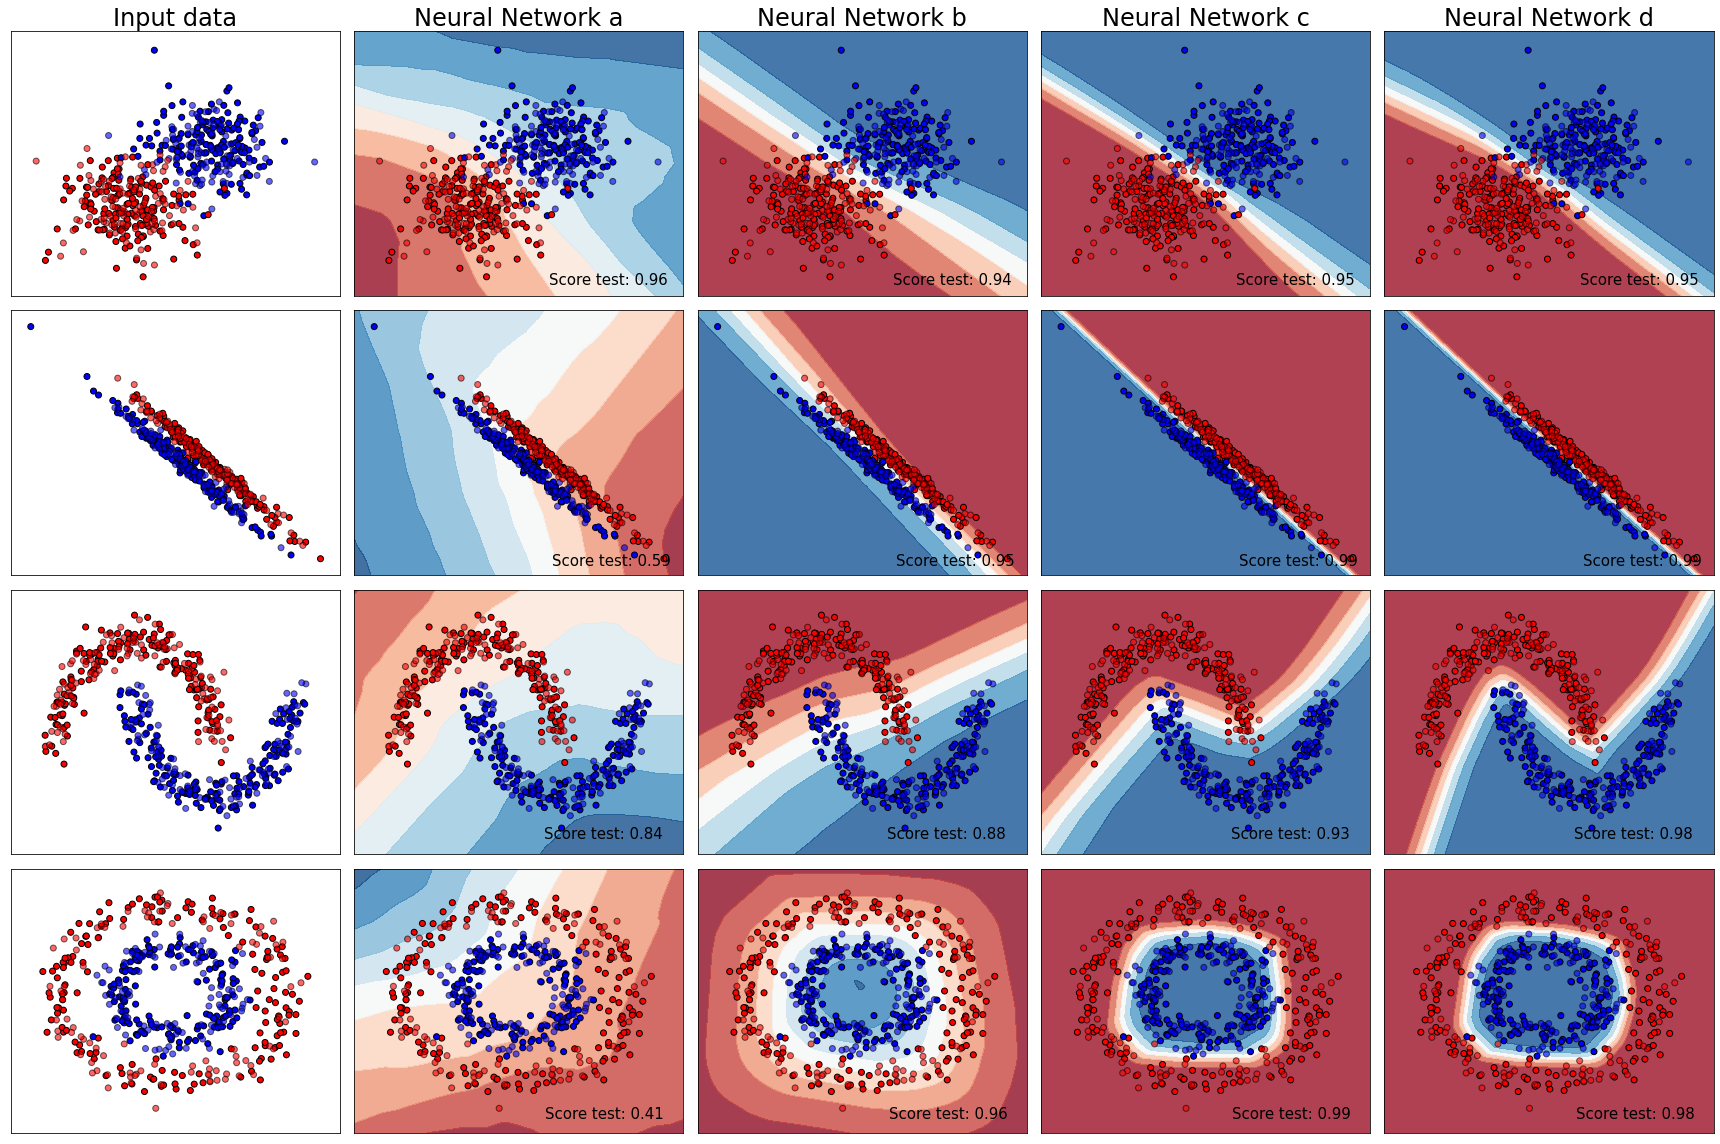

In [21]:
classifiers = [("Neural Network a",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=10,
                              alpha=0)),
              ("Neural Network b",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=100,
                              alpha=0)),
              ("Neural Network c",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=500,
                              alpha=0)),
              ("Neural Network d",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=1000,
                              alpha=0)),
              ]

plot_classifiers(classifiers, datasets)

Aqui podemos observar que el número de iteraciones de entrenamiento sí afecta más directamente al resultado de la red neuronal, conforme aumenta el número de iteraciones mejora mucho el resultado, aunque como ya hablamos con los árboles de deciosiones llega rápidamente a un estado en el que aumentar el número de iteraciones no mejora apenas el reslultado y se convierte en un gasto innecesario de recursos.